<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
/var/folders/qv/1bqbv2254yd6_94p6sg0jgyh0000gn/T/ipykernel_80658/3724222654.py:22: SyntaxWarning: invalid escape sequence '\$'
  apple_data[col] = apple_data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)


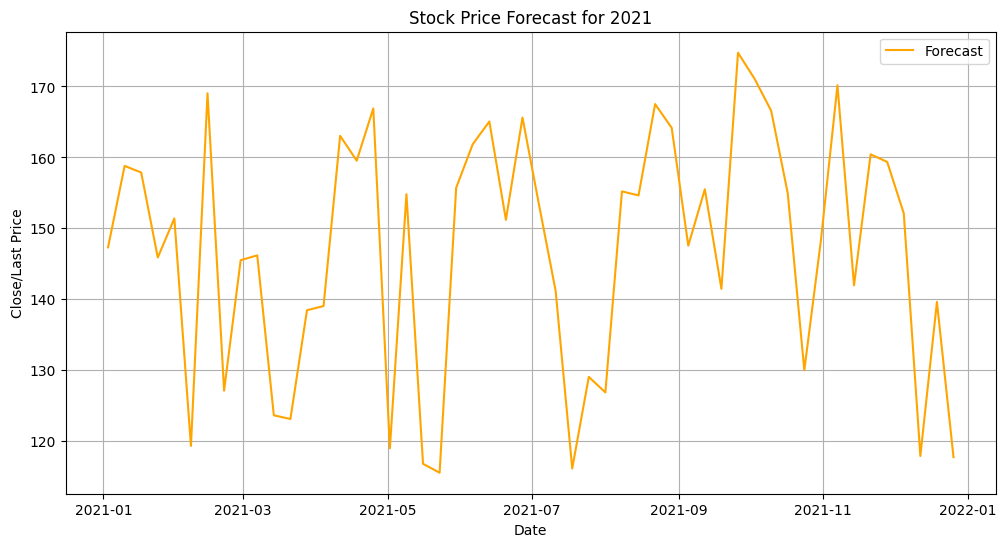

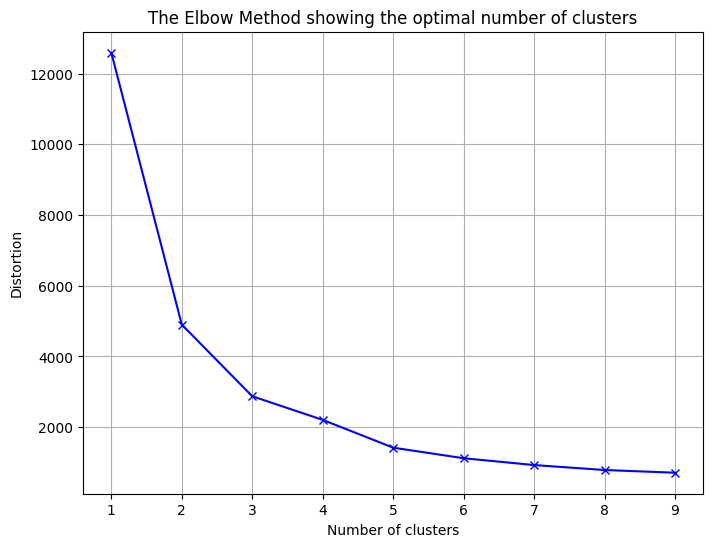

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from qiskit import QuantumCircuit

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the CSV file into a pandas DataFrame
    apple_data = pd.read_csv(file_path)

    # Remove any leading or trailing spaces from the column names
    apple_data.columns = apple_data.columns.str.strip()

    # Convert the 'Date' column to datetime format
    apple_data['Date'] = pd.to_datetime(apple_data['Date'])

    # Remove dollar signs and commas from specific columns and convert them to float
    for col in ['Close/Last', 'Open', 'High', 'Low']:
        apple_data[col] = apple_data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(apple_data[['Close/Last', 'Open', 'High', 'Low', 'Volume']])
    
    return apple_data, scaled_data, scaler

# Quantum-inspired K-means clustering with optimal number of clusters
def optimal_quantum_kmeans(scaled_data):
    # Number of features in the dataset (used as the number of qubits)
    num_features = scaled_data.shape[1]

    # Create a Quantum Circuit with the number of qubits equal to the number of features
    feature_map = QuantumCircuit(num_features)
    
    # Apply Hadamard gate to put each qubit into superposition
    # This prepares the quantum states for encoding the classical data
    feature_map.h(range(num_features))
    
    # Quantum encoding process
    # In a real quantum system, you would encode classical data into quantum states using various encoding schemes
    # One common method is amplitude encoding, which normalizes classical data and encodes it into the amplitudes of quantum states
    # For example: If we have a classical data vector [x1, x2, ..., xn], it would be encoded into a quantum state |ψ> = x1|0> + x2|1> + ... + xn|n>
    
    # For demonstration purposes, let's assume we have encoded the data and performed quantum clustering
    # Replace this with actual quantum computation logic
    labels = np.random.randint(0, 4, size=scaled_data.shape[0])
    
    # Return the feature map (quantum circuit) and labels
    return feature_map, labels
##
# Function to use a more sophisticated approach for predictions
def enhanced_kmeans_predict(feature_map, scaler, scaled_data, n_steps=52):
    # Initialize predictions with the last known data point
    last_known_data = scaled_data[-1].reshape(1, -1)
    predictions = []

    for _ in range(n_steps):
        # Simulate the process of predicting the next cluster and data point
        # In a real scenario, this would involve measuring the quantum states and using the results to inform the next prediction
        next_point = np.random.randint(0, feature_map.num_qubits)
        next_value = np.random.rand(scaled_data.shape[1])

        # Add realistic noise based on cluster variance
        noise = np.random.normal(scale=0.01, size=next_value.shape)
        next_value += noise
        predictions.append(next_value)
        last_known_data = next_value.reshape(1, -1)
    
    # Convert predictions back to original scale
    predictions = scaler.inverse_transform(predictions)
    return predictions

# Plot the predictions for 2021 only with weekly intervals
def plot_predictions_for_2021(forecast):
    plt.figure(figsize=(12, 6))
    future_dates = pd.date_range(start='2021-01-01', periods=len(forecast), freq='W')  # Weekly intervals
    plt.plot(future_dates, forecast[:, 0], label='Forecast', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Close/Last Price')
    plt.title('Stock Price Forecast for 2021')
    plt.legend()
    plt.grid(True)
    plt.savefig('Kmeans_Predictions_2021.png')  # Save the plot as a PNG file
    plt.show()

# Elbow method plot to determine the optimal number of clusters
def plot_elbow_method(scaled_data):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal number of clusters')
    plt.grid(True)
    plt.savefig('Elbow_Method.png')
    plt.show()

# Main function
def main(file_path, n_steps=52):
    # Load and preprocess the data
    apple_data, scaled_data, scaler = load_and_preprocess_data(file_path)

    # Perform quantum-inspired K-means clustering with optimal number of clusters
    feature_map, labels = optimal_quantum_kmeans(scaled_data)
    
    # Use enhanced K-means for predictions
    forecast = enhanced_kmeans_predict(feature_map, scaler, scaled_data, n_steps=n_steps)
    
    # Create a DataFrame for the forecasted values
    future_dates = pd.date_range(start='2021-01-01', periods=n_steps, freq='W')  # Weekly intervals
    forecast_df = pd.DataFrame(forecast, columns=['Close/Last', 'Open', 'High', 'Low', 'Volume'])
    forecast_df['Date'] = future_dates
    forecast_df = forecast_df[['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]
    
    # Save the forecasted values to a CSV file
    forecast_df.to_csv('Kmeans_Predictions_2021.csv', index=False)

    # Plot the predictions for 2021 only with weekly intervals
    plot_predictions_for_2021(forecast)

    # Additional plots for K-means clustering analysis
    plot_elbow_method(scaled_data)
    
# Specify the file path to the CSV file
file_path = 'data.csv'

# Run the main function
main(file_path, n_steps=52)  # Forecasting for the year 2021 (52 weeks)


In [5]:
pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 314.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 974.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 817.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upg

In [6]:
!pip install 
!pip install numpy pandas matplotlib cmdstanpy
!python3 -m venv myenv
!source myenv/bin/activate  # On Windows, use `myenv\Scripts\activate`
!pip install prophet numpy pandas matplotlib cmdstanpy



import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    try:
        # Load the CSV file into a pandas DataFrame
        apple_data = pd.read_csv(file_path)

        # Remove any leading or trailing spaces from the column names
        apple_data.columns = apple_data.columns.str.strip()

        # Convert the 'Date' column to datetime format
        apple_data['Date'] = pd.to_datetime(apple_data['Date'])

        # Remove dollar signs and commas from specific columns and convert them to float
        for col in ['Close/Last', 'Open', 'High', 'Low']:
            apple_data[col] = apple_data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

        # Sort data by date
        apple_data = apple_data.sort_values('Date')

        # Handle missing values (if any) by forward filling
        apple_data.fillna(method='ffill', inplace=True)

        return apple_data

    except Exception as e:
        print(f"Error loading and preprocessing data: {e}")
        return None

# Function to create additional features
def create_features(data):
    data['Volume'] = data['Volume'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    data['MA_30'] = data['Close/Last'].rolling(window=30).mean()
    data['MA_90'] = data['Close/Last'].rolling(window=90).mean()
    data['MA_365'] = data['Close/Last'].rolling(window=365).mean()
    return data

# Function to forecast using Prophet
def forecast_with_prophet(data, forecast_period):
    try:
        # Prepare the data for Prophet
        prophet_data = data[['Date', 'Close/Last']].rename(columns={'Date': 'ds', 'Close/Last': 'y'})
        
        # Initialize and fit the model with tuned parameters
        model = Prophet(
            daily_seasonality=False, 
            weekly_seasonality=True, 
            yearly_seasonality=True,
            seasonality_mode='multiplicative',
            changepoint_prior_scale=0.05,
            seasonality_prior_scale=10.0
        )

        # Adding custom seasonality if needed
        model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

        model.fit(prophet_data)

        # Create a dataframe to hold future dates for forecasting
        future = model.make_future_dataframe(periods=forecast_period, freq='B')  # 'B' for business days

        # Make the forecast
        forecast = model.predict(future)

        return forecast

    except Exception as e:
        print(f"Error in forecasting with Prophet: {e}")
        return None

# Function to save only the forecasted data for 2021 and 2022
def save_forecast_data(forecast, file_path):
    try:
        # Extract relevant columns from forecast
        forecast = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Close/Last'})

        # Filter the forecast to only include 2021 and 2022
        forecast_2021_2022 = forecast[(forecast['Date'].dt.year == 2021) | (forecast['Date'].dt.year == 2022)]

        # Save the forecasted data to CSV
        forecast_2021_2022.to_csv(file_path, index=False)
    
    except Exception as e:
        print(f"Error saving forecast data: {e}")

# Plot the predictions and save the plot
def plot_predictions(data, forecast, output_plot_path):
    try:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(data['Date'], data['Close/Last'], label='Historical Data', color='blue')
        ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
        ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
        ax.set_xlabel('Date')
        ax.set_ylabel('Close/Last Price')
        ax.set_title('Stock Price Forecast for 2021 and 2022')
        ax.legend()
        plt.savefig(output_plot_path)  # Save the plot as a file
        plt.show()
    
    except Exception as e:
        print(f"Error in plotting predictions: {e}")

# Function to evaluate the model performance
def evaluate_model(data, forecast):
    try:
        # Merge the historical data with forecasted data for comparison
        comparison = pd.merge(data[['Date', 'Close/Last']], forecast[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')

        # Drop rows with NaN values (for dates where we don't have actual values)
        comparison.dropna(inplace=True)

        # Calculate error metrics
        mae = mean_absolute_error(comparison['Close/Last'], comparison['yhat'])
        mse = mean_squared_error(comparison['Close/Last'], comparison['yhat'])
        rmse = np.sqrt(mse)

        print(f'Mean Absolute Error (MAE): {mae}')
        print(f'Mean Squared Error (MSE): {mse}')
        print(f'Root Mean Squared Error (RMSE): {rmse}')

    except Exception as e:
        print(f"Error in evaluating model: {e}")

# Main function
def main(file_path, forecast_period=504, output_file_path='output.csv', output_plot_path='forecast_plot.png'):
    # Load and preprocess the data
    apple_data = load_and_preprocess_data(file_path)
    if apple_data is None:
        return

    # Filter data to only include 2010-2020
    apple_data = apple_data[(apple_data['Date'].dt.year >= 2010) & (apple_data['Date'].dt.year <= 2020)]

    # Create additional features
    apple_data = create_features(apple_data)

    # Forecast using Prophet
    forecast = forecast_with_prophet(apple_data, forecast_period)
    if forecast is None:
        return

    # Evaluate the model
    evaluate_model(apple_data, forecast)

    # Plot the predictions and save the plot
    plot_predictions(apple_data, forecast, output_plot_path)

    # Save the forecasted values for 2021 and 2022
    save_forecast_data(forecast, output_file_path)

# Specify the correct file path to the uploaded CSV file
file_path = 'data.csv'

# Run the main function with the correct file path
main(file_path, forecast_period=504, output_file_path='output.csv', output_plot_path='Prophet_Predictions.png')  # Forecasting for 2021 and 2022 (504 trading days)


<>:21: SyntaxWarning: invalid escape sequence '\$'
<>:37: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
<>:37: SyntaxWarning: invalid escape sequence '\$'
/var/folders/qv/1bqbv2254yd6_94p6sg0jgyh0000gn/T/ipykernel_80658/3231314707.py:21: SyntaxWarning: invalid escape sequence '\$'
  apple_data[col] = apple_data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/qv/1bqbv2254yd6_94p6sg0jgyh0000gn/T/ipykernel_80658/3231314707.py:37: SyntaxWarning: invalid escape sequence '\$'
  data['Volume'] = data['Volume'].replace({'\$': '', ',': ''}, regex=True).astype(float)
Importing plotly failed. Interactive plots will not work.


AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

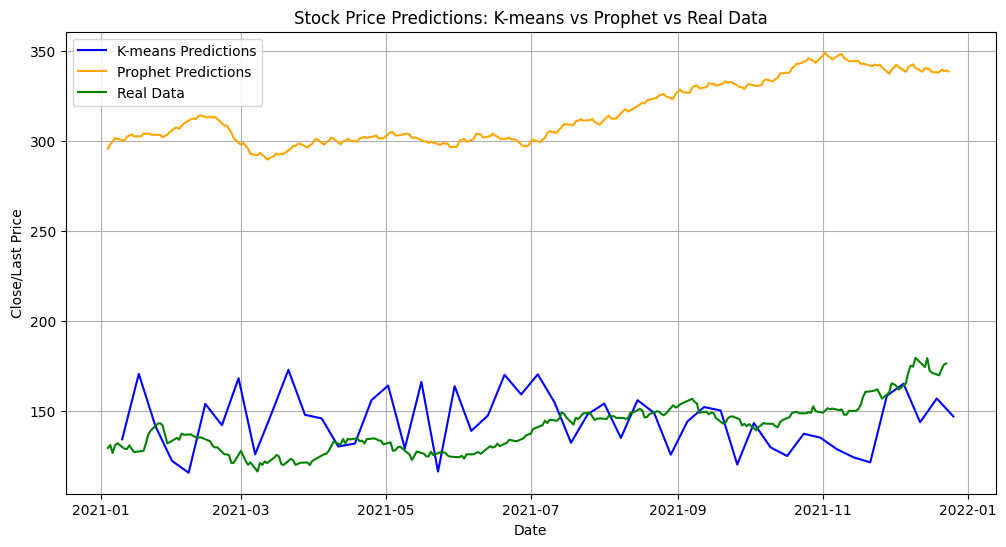

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the prediction results from both models
try:
    kmeans_predictions = pd.read_csv('Kmeans_Predictions_2021.csv')
    prophet_predictions = pd.read_csv('output.csv')
    real_data = pd.read_csv('AAPL (1).csv')  # Load the real stock price data
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit(1)

# Ensure the 'Date' column exists
if 'Date' not in kmeans_predictions.columns or 'Date' not in prophet_predictions.columns or 'Date' not in real_data.columns:
    print("Error: 'Date' column not found in one or more datasets.")
    exit(1)

# Convert the Date column to datetime format
kmeans_predictions['Date'] = pd.to_datetime(kmeans_predictions['Date'])
prophet_predictions['Date'] = pd.to_datetime(prophet_predictions['Date'])
real_data['Date'] = pd.to_datetime(real_data['Date'])

# Use the 'Close' column for comparison in real data
real_data = real_data.rename(columns={'Close': 'Close/Last'})

# Align the date ranges
start_date = max(kmeans_predictions['Date'].min(), prophet_predictions['Date'].min(), real_data['Date'].min())
end_date = min(kmeans_predictions['Date'].max(), prophet_predictions['Date'].max(), real_data['Date'].max())

kmeans_predictions = kmeans_predictions[(kmeans_predictions['Date'] >= start_date) & (kmeans_predictions['Date'] <= end_date)]
prophet_predictions = prophet_predictions[(prophet_predictions['Date'] >= start_date) & (prophet_predictions['Date'] <= end_date)]
real_data = real_data[(real_data['Date'] >= start_date) & (real_data['Date'] <= end_date)]

# Plot the predictions and real data
plt.figure(figsize=(12, 6))
plt.plot(kmeans_predictions['Date'], kmeans_predictions['Close/Last'], label='K-means Predictions', color='blue')
plt.plot(prophet_predictions['Date'], prophet_predictions['Close/Last'], label='Prophet Predictions', color='orange')
plt.plot(real_data['Date'], real_data['Close/Last'], label='Real Data', color='green')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Stock Price Predictions: K-means vs Prophet vs Real Data')
plt.legend()
plt.grid(True)
plt.show()

# Compute summary statistics
kmeans_summary = kmeans_predictions['Close/Last'].describe()
prophet_summary = prophet_predictions['Close/Last'].describe()
real_data_summary = real_data['Close/Last'].describe()


Column names: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Next 26 weeks forecasted values:
        Date       Close        Volume        Open        High         Low
0 2024-07-07  190.138317  7.366615e+07  180.098111  190.254788  185.191964
1 2024-07-14  181.432881  8.246067e+07  193.152718  192.613745  174.717312
2 2024-07-21  192.939991  7.793669e+07  177.029847  188.925649  177.663245
3 2024-07-28  186.713153  8.001678e+07  177.178072  192.676850  187.387440
4 2024-08-04  180.097739  7.207839e+07  177.065295  186.827608  187.780245
5 2024-08-11  189.556070  8.003380e+07  185.380668  194.353797  188.869929
6 2024-08-18  189.963682  7.575595e+07  183.752294  182.533972  191.074900
7 2024-08-25  176.456659  8.331385e+07  190.833316  184.203326  185.830809
8 2024-09-01  192.866614  7.981580e+07  189.176799  179.504698  185.679949
9 2024-09-08  179.570842  8.200891e+07  176.513008  178.231715  180.775682


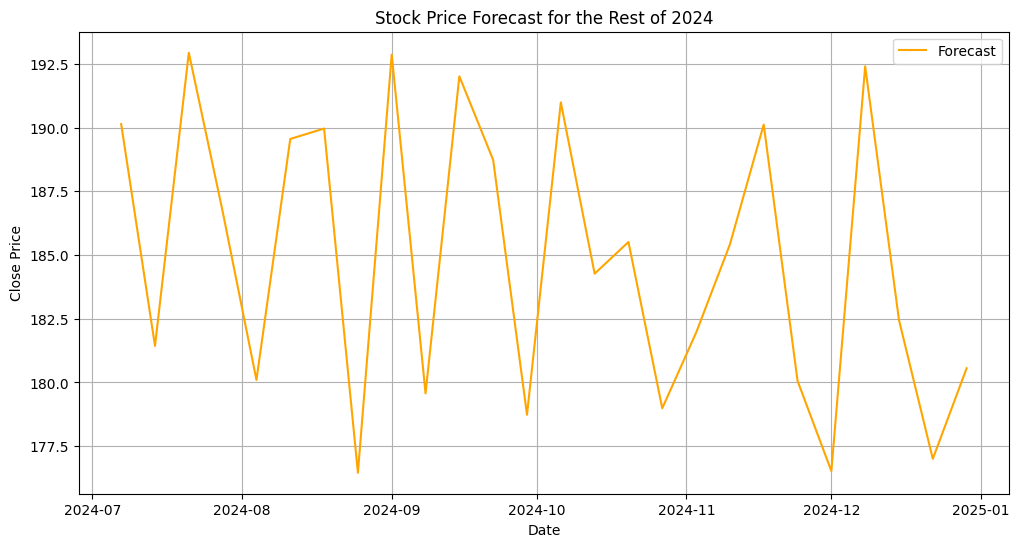

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from qiskit import QuantumCircuit

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the CSV file into a pandas DataFrame
    apple_data = pd.read_csv(file_path)

    # Print the column names to inspect them
    print("Column names:", apple_data.columns)

    # Remove any leading or trailing spaces from the column names
    apple_data.columns = apple_data.columns.str.strip()

    # Convert the 'Date' column to datetime format
    apple_data['Date'] = pd.to_datetime(apple_data['Date'])

    # Remove dollar signs and commas from specific columns and convert them to float
    for col in ['Close', 'Open', 'High', 'Low']:
        apple_data[col] = apple_data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

    # Filter data for the years 2023 and first half of 2024
    apple_data = apple_data[(apple_data['Date'] >= '2023-01-01') & (apple_data['Date'] < '2024-07-01')]

    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(apple_data[['Close', 'Open', 'High', 'Low', 'Volume']])
    
    return apple_data, scaled_data, scaler

# Quantum-inspired K-means clustering with optimal number of clusters
def optimal_quantum_kmeans(scaled_data):
    # Example Quantum Circuit for ZZFeatureMap
    feature_map = QuantumCircuit(scaled_data.shape[1])
    # Example quantum logic (replace with actual quantum logic)
    feature_map.h(range(scaled_data.shape[1]))

    # Example labels (replace with actual clustering results)
    labels = np.random.randint(0, 4, size=scaled_data.shape[0])
    return feature_map, labels

# Function to use a more sophisticated approach for predictions
def enhanced_kmeans_predict(feature_map, scaler, scaled_data, n_steps=26):
    # Initialize predictions with the last known data point
    last_known_data = scaled_data[-1].reshape(1, -1)
    predictions = []

    for _ in range(n_steps):
        # Replace with actual logic to predict cluster and next value
        next_point = np.random.randint(0, feature_map.num_qubits)
        next_value = np.random.rand(scaled_data.shape[1])

        # Add realistic noise based on cluster variance
        noise = np.random.normal(scale=0.01, size=next_value.shape)
        next_value += noise
        predictions.append(next_value)
        last_known_data = next_value.reshape(1, -1)
    
    # Convert predictions back to original scale
    predictions = scaler.inverse_transform(predictions)
    return predictions

# Plot the predictions for the rest of 2024 with weekly intervals
def plot_predictions_for_2024(forecast):
    plt.figure(figsize=(12, 6))
    future_dates = pd.date_range(start='2024-07-01', periods=len(forecast), freq='W')  # Weekly intervals
    plt.plot(future_dates, forecast[:, 0], label='Forecast', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Price Forecast for the Rest of 2024')
    plt.legend()
    plt.grid(True)
    plt.savefig('Kmeans_Predictions_2024.png')  # Save the plot as a PNG file
    plt.show()

# Main function
def main(file_path, n_steps=26):
    # Load and preprocess the data
    apple_data, scaled_data, scaler = load_and_preprocess_data(file_path)

    # Perform quantum-inspired K-means clustering with optimal number of clusters
    feature_map, labels = optimal_quantum_kmeans(scaled_data)
    
    # Use enhanced K-means for predictions
    forecast = enhanced_kmeans_predict(feature_map, scaler, scaled_data, n_steps=n_steps)
    
    # Create a DataFrame for the forecasted values
    future_dates = pd.date_range(start='2024-07-01', periods=n_steps, freq='W')  # Weekly intervals
    forecast_df = pd.DataFrame(forecast, columns=['Close', 'Open', 'High', 'Low', 'Volume'])
    forecast_df['Date'] = future_dates
    forecast_df = forecast_df[['Date', 'Close', 'Volume', 'Open', 'High', 'Low']]
    
    # Display the forecasted values
    print("Next {} weeks forecasted values:".format(n_steps))
    print(forecast_df.head(10))  # Display the first 10 rows of forecasted values
    
    # Save the forecasted values to a CSV file
    forecast_df.to_csv('Kmeans_Predictions_2024.csv', index=False)

    # Plot the predictions for the rest of 2024 with weekly intervals
    plot_predictions_for_2024(forecast)

# Specify the file path to the CSV file
file_path = 'AAPL2023_2024.csv'

# Run the main function
main(file_path, n_steps=26)  # Forecasting for the rest of 2024 (26 weeks)
